In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv(r"C:\\Users\\Giorgis\\Desktop\\Projects\\ADTA coursework\\partI\\Census.csv")
data.head()

,Person ID,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,No of hours,Approximated Social Grade
0,7394816,E12000001,H,2,1,2,6,2,2,1,2,1,2,5,8,2,-9,NaN,4
1,7394832,E12000001,H,3,1,2,1,1,2,1,2,1,1,-9,-9,-9,-9,NaN,-9
2,7394719,E12000001,H,2,1,1,7,2,2,1,1,1,2,5,8,2,-9,NaN,2
3,7394840,E12000001,H,1,1,2,6,4,2,1,3,1,2,5,9,5,-9,NaN,4
4,7394711,E12000001,H,2,1,1,1,1,1,1,1,1,1,-9,-9,-9,-9,NaN,-9


# Dealing with the missing data in the "No of hours" column


Replacing every missing value with mean of the rest of the values in the column

In [3]:
no_of_hours_mean = round(np.mean(data['No of hours']),2)
hours = data.copy()
hours['No of hours'] = hours['No of hours'].replace(np.nan, no_of_hours_mean)
hours.head()

,Person ID,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,No of hours,Approximated Social Grade
0,7394816,E12000001,H,2,1,2,6,2,2,1,2,1,2,5,8,2,-9,35.23,4
1,7394832,E12000001,H,3,1,2,1,1,2,1,2,1,1,-9,-9,-9,-9,35.23,-9
2,7394719,E12000001,H,2,1,1,7,2,2,1,1,1,2,5,8,2,-9,35.23,2
3,7394840,E12000001,H,1,1,2,6,4,2,1,3,1,2,5,9,5,-9,35.23,4
4,7394711,E12000001,H,2,1,1,1,1,1,1,1,1,1,-9,-9,-9,-9,35.23,-9


In [4]:
# sns.boxplot(x='No of hours', data=data)
# data

# Creating a table with the mean values 
of the No of hours of every gender in every region


In [5]:
hrs_inSexReg = data.pivot_table(index='Industry', columns='Region', values='No of hours')
(hrs_inSexReg)

Region,E12000001,E12000002,E12000003,E12000004,E12000005,E12000006,E12000007,E12000008,E12000009,W92000004
Industry,,,,,,,,,,
1,44.808219,43.289683,40.768868,41.683398,42.160643,39.067227,31.571429,39.170000,40.344468,44.182796
2,39.393305,38.999218,39.146455,39.324781,39.192341,38.977137,38.616941,39.151116,39.131551,39.214785
3,39.477660,38.808564,39.037430,38.923786,39.529474,39.862794,39.364048,40.064137,39.142648,39.239669
4,31.954520,32.749400,32.496535,33.801610,32.592133,32.896493,32.496327,32.625076,32.131292,31.159683
5,28.099281,29.476395,28.357245,28.695212,29.326284,30.069394,33.305869,30.858053,30.877148,29.698889
6,38.591457,38.308408,38.521089,39.012085,38.143400,39.142356,38.563433,38.869517,38.488649,38.022573
7,35.318182,37.187913,36.607717,36.228070,37.591358,39.292852,42.345994,38.822266,37.180105,36.117949
8,35.604949,35.479324,34.856777,35.217892,35.253768,35.638235,37.769912,35.871284,34.622648,34.940439
9,36.095187,36.524365,36.887664,36.582549,37.449010,37.768853,37.679329,38.274137,37.882449,37.152751


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

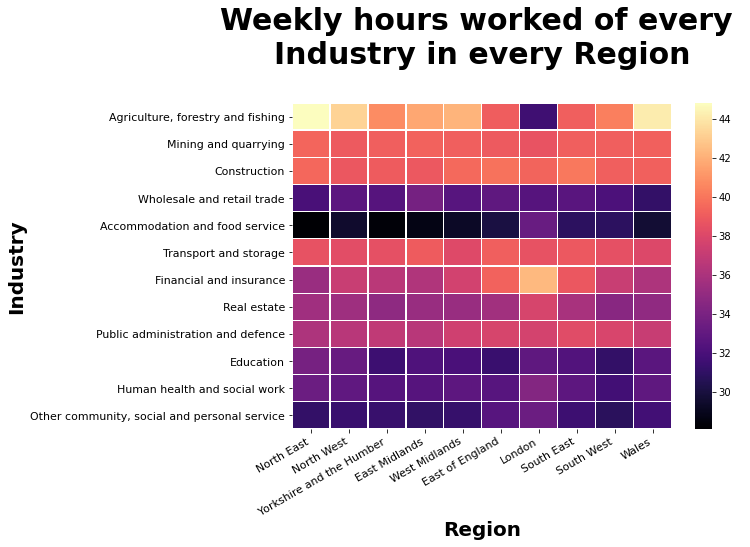

In [6]:
plt.figure(figsize=(8.5, 6))

ax = sns.heatmap(hrs_inSexReg, cmap='magma', linecolor='white', linewidth=0.2)

ax.set_xlabel('Region', size=20, fontweight='bold')
ax.set_ylabel('Industry', size=20, fontweight='bold')
ax.set_title('Weekly hours worked of every \nIndustry in every Region\n', size=30, fontweight='bold')


ax.set_xticklabels(('North East', 'North West', 'Yorkshire and the Humber',
                   'East Midlands', 'West Midlands', 'East of England', 'London',
                   'South East', 'South West', 'Wales'))

ax.set_yticklabels(('Agriculture, forestry and fishing', 'Mining and quarrying',
                   'Construction', 'Wholesale and retail trade', 'Accommodation and food service',
                   'Transport and storage', 'Financial and insurance', 'Real estate',
                   'Public administration and defence', 'Education', 'Human health and social work',
                   'Other community, social and personal service'))

plt.setp(ax.get_yticklabels(), rotation=0, size=11)
plt.setp(ax.get_xticklabels(), rotation=30, ha='right', size=11)


# plt.savefig('HtM_Rg_Ind_hrs.jpeg')